In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import measure
import pandas as pd

In [ ]:
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def extract_features(image):
    labels = measure.label(image)
    props = measure.regionprops(labels)
    features = []
    for prop in props:
        features.append({
            "area": prop.area,
            "perimeter": prop.perimeter,
            "eccentricity": prop.eccentricity,
            "mean_intensity": np.mean(image[prop.coords[:, 0], prop.coords[:, 1]])
        })
    return features

In [ ]:
def load_and_process_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort()  # Ensure images are processed in a consistent order
    all_features = []
    for file_name in image_files:
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        preprocessed_img = preprocess_image(img)
        features = extract_features(preprocessed_img)
        all_features.append(features)
    return all_features

# Example usage
folder_path = '/content/drive/MyDrive/Upload'
features_all = load_and_process_images(folder_path)

Correlation Matrix: [[ 1.         -0.00430519]
 [-0.00430519  1.        ]]


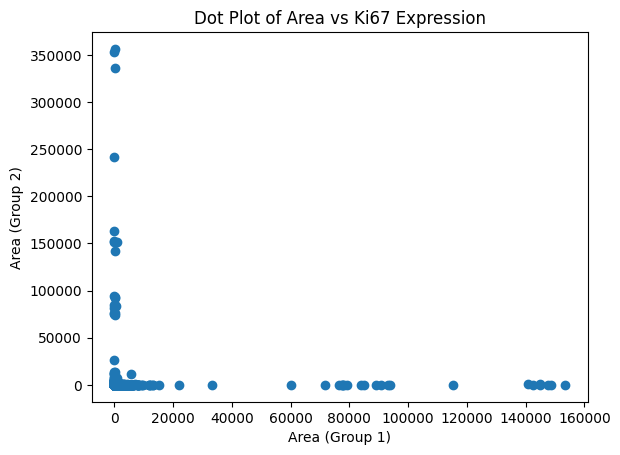

In [ ]:

def analyze_correlation(features_group1, features_group2):
    min_len = min(len(features_group1), len(features_group2))
    features_group1 = features_group1[:min_len]
    features_group2 = features_group2[:min_len]

    areas1 = [f["area"] for f in features_group1]
    areas2 = [f["area"] for f in features_group2]

    correlation = np.corrcoef(areas1, areas2)
    return correlation

def plot_results(features_group1, features_group2):
    min_len = min(len(features_group1), len(features_group2))
    trimmed_group1 = features_group1[:min_len]
    trimmed_group2 = features_group2[:min_len]

    areas1 = [f["area"] for f in trimmed_group1]
    areas2 = [f["area"] for f in trimmed_group2]

    plt.scatter(areas1, areas2)
    plt.title('Dot Plot of Area vs Ki67 Expression')
    plt.xlabel('Area (Group 1)')
    plt.ylabel('Area (Group 2)')
    plt.show()

# Organize into two groups
group1_features = features_all[:18]  # First 18 images
group2_features = features_all[18:]  # Next 18 images

# Flatten features for each group
flattened_group1 = [item for sublist in group1_features for item in sublist]
flattened_group2 = [item for sublist in group2_features for item in sublist]

# Analyze correlation
correlation = analyze_correlation(flattened_group1, flattened_group2)
print("Correlation Matrix:", correlation)

# Plot results
plot_results(flattened_group1, flattened_group2)